# Trabajo Semanal 1
### Joaquin Ezequiel Alvarez Olmedo

El trabajo semanal 1 consiste en analizar el siguiente circuito y obtener su transferencia, respuesta en frecuencia y transferencia normalizada:

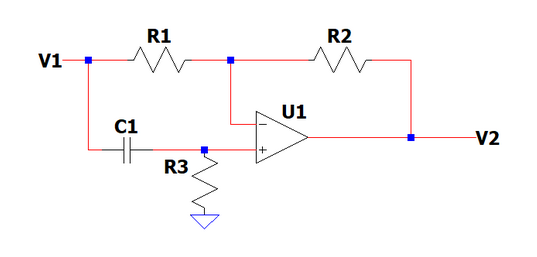

Comenzamos planteando las ecuaciones de nodos en las entradas del OP AMP: adelantamos que la tensión en ambos nodos son iguales

1) $ V_a(\frac{1}{R_1} + \frac{1}{R_2}) - V_1(\frac{1}{R_1}) - V_2(\frac{1}{R_2}) = 0 $
2) $ V_a(SC + 1/R_3) - V_1(SC) = 0 $

De 2 obtenemos: 

$ V_a = V_1(\frac{SCR_3}{SCR_3 + 1}) $

Reemplazando 2 en 1: 

$ V_1(\frac{2SCR_3}{(SCR_3 + 1)R}) = V_1(\frac{1}{R}) + V_2(\frac{1}{R}) $

$ V_1(\frac{2SCR_3}{SCR_3 + 1} - 1) = V_2 $

$ T(S) = \frac{V_2}{V_1} = \frac{SCR_3 - 1}{SCR_3 + 1} $

La transferencia obtenida es la siguiente:

$ T(S) = \frac{S - \frac{1}{CR_3}}{S + \frac{1}{CR_3}} $

Donde $ w0 = \frac{1}{CR_3} $

(1, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

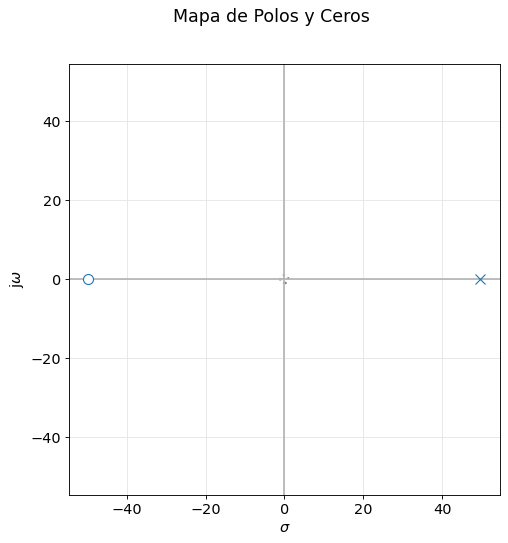

In [28]:
# Importamos librerias

import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as sig
from pytc2.sistemas_lineales import bodePlot, pzmap


# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})


# Armamos la transferencia

R3 = 50000
C = 100*10^-6

w0 = 1/C*R3

num = np.array([1, -w0])
den = np.array([1, w0])

H1 = sig.TransferFunction(num, den)

pzmap(H1)

A sumple vista podemos ver que la transferencia $ T(S) = \frac{Q(-S)}{Q(S)} $. Evaluamos la transferencia para S = jw:

$ T(jw) = \frac{jw - \frac{1}{CR_3}}{jw + \frac{1}{CR_3}} $

$ |T(jw)| = 1 $

Q es par, por lo tanto $ |Q(S)| = |Q(-S)| $. Sabiendo esto, confirmamos que el cociente siempre es 1 para toda frecuencia. Pero si el módulo es siempre 1... ¿Cual es la gracia del circuito? Analicemos la fase:

$ T(jw) = 1 \frac{e^{-j\arctan{WCR_3}}}{e^{j\arctan{WCR_3}}} $

$ T(jw) = e^{-j2\arctan{WCR_3}}$

$ \varphi_T(w) = \pi-2\arctan{WCR_3} $

Vemos que la fase esta invertida ($\pi$ suma 180 grados) y rota el doble de rápido.

A continuacion, ploteamos la respuesta en frecuencia:

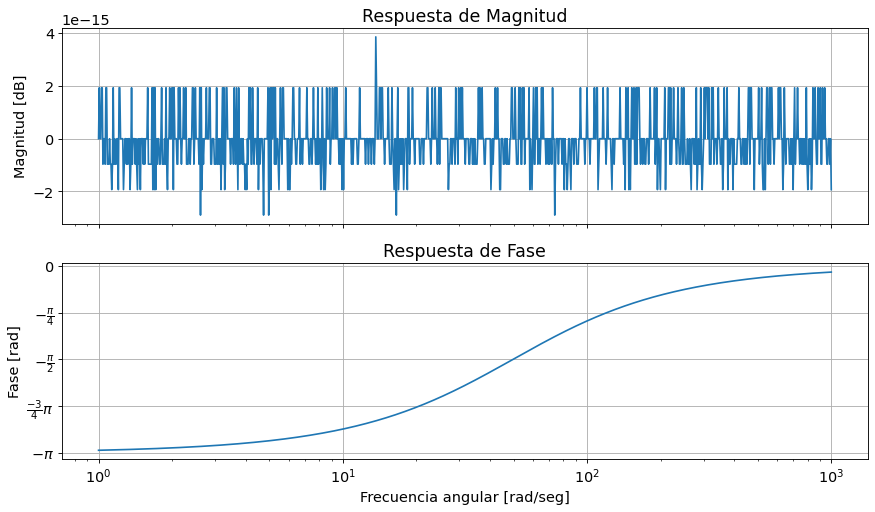

In [29]:
_, axes_hdl = bodePlot(H1)
plt.sca(axes_hdl[0])

A continuación, normalizamos el circuito en frecuencia y en impedancia:

$ T(S) = \frac{S - 1}{S + 1} $

Si w0 = 1 entonces: $ \frac{1}{CR_3} = 1 $

y por lo tanto: $ C = \frac{1}{R_3} $

Si ahora normalizamos en impedancia respecto de R3: $ R_3 = 1 $ , $ C = 1 $

R1 y R2 pueden tomar cualquier valor. No afectan a la transferencia. Para simplificar el diseño: $ R_1 = R_2 = R_3 = 1 $

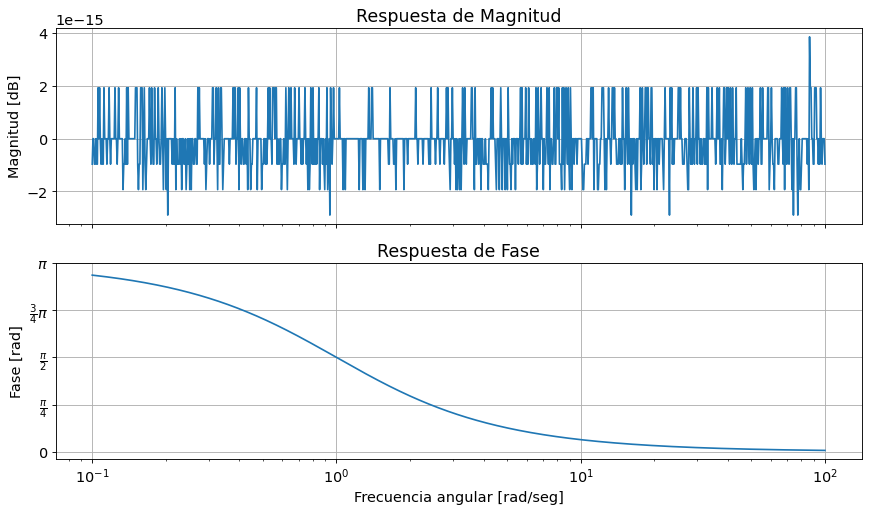

In [27]:
# Armamos la transferencia

R3 = 1    # Normalizado en impedancia respecto de R3
C = 1/R3  # Para cumplir con la norma de frecuencia se debe mantener esta proporcion

w0 = 1/C*R3

num = np.array([1, -w0])
den = np.array([1, w0])

H1 = sig.TransferFunction( num, den )

_, axes_hdl = bodePlot(H1)
plt.sca(axes_hdl[0])

Ahora simulamos en Spice para ver que respuesta en frecuencia obtenemos:

**INSERTAR IMAGENES SPICE**

Como conclusión de esta tarea semanal, luego de haber analizado y simulado, somos capaces de reconocer que el circuito es un filtro pasa-todo. No gana ni pierde en módulo pero invierte la fase. Esta caracteristica nos resulta útil para crear retardos en la señal de salida.